Už jsme viděli mnoho nástrojů pro numerické výpočty. Co ale symbolické výpočty? Každý ví, že derivovat umí i cvičená opice, bude to umět i Python? Nečekaná odpověď je ano. Symbolické výpočty naučil Python [Ondřej Čertík](http://ondrejcertik.com/) v balíku [SymPy](http://sympy.org/).
<!-- TEASER_END -->

Tento notebook byl z (velké) části převzat a přeložen z J.R. Johansson: [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) - díky.

## Na úvod

Někteří z vás možná znáte nějaký systém pro *počítačovou algebru* (Computer Algebra Systems -- CAS), např. Maple, Mathematica, Derive, Maxima, Reduce. Pro Python existují dva velké projekty počítačové algebry:

* [SymPy](http://sympy.org) - modul který může být použit v jakémkoli Python programu a je dobře podporován v Jupyter Notebook. 
* [Sage](http://www.sagemath.org/) - toto je už kompletní (a velice obsáhlý) systém, který si klade za cíl být open source konkurentem komerčním produktům.

My se tady podíváme na některé základní možnosti SymPy.

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sympy

In [3]:
sympy.init_printing()

## Definujeme symboly

Pro symbolické výpočty potřebujeme pochopitelně symboly, tak jak jsme zvyklí už z matematiky na základní škole. V Pythonu samotném máme sice proměnné, které jsou v podstatě také symboly, ale operace s nimy se řídí zcela jinými pravidly než potřebujeme pro symbolické výpočty. Naštěstí tu je třída `sympy.Symbol`.

In [4]:
x = sympy.Symbol('x')
x

Co když napíšeme něco trochu složitějšího.

In [5]:
(sympy.pi + x) / 2

In [6]:
# co jsme to vůbec dostali za typ
type(_)

sympy.core.add.Add

Můžeme také přičadit symbolům nějaké vlastnosti (to se pak pochopitelně může projevit v dalších výpočtech).

In [8]:
a = sympy.Symbol('a', real=True)
a.is_complex

True

In [9]:
b = sympy.Symbol('b', positive=True)

In [10]:
b.is_real

True

In [11]:
b > 0

### Zlomky

In [12]:
r1 = sympy.Rational(4,5)
r2 = sympy.Rational(5,4)
r1, r2

In [13]:
r1 + r2

## Vyčíslování

In [14]:
y = (x + sympy.pi)**2

Numerickou hodnotu můžeme získat pomocí funkce `N`. Často také využijeme metodu `subs`:

In [15]:
sympy.N(y.subs(x, 2), 5)

To samé pomocí metody `evalf`. Pro obojí můžeme zadat počet platných číslic.

In [16]:
sympy.pi.evalf(100)

Pokud chceme vytvořit ze symbolického výrazu funkci, použijeme `lambdify`:

In [17]:
# první argument je seznam proměnných (podobně jako pro lambda funkce)
f_x = sympy.lambdify([x], (x + sympy.pi)**2, 'numpy')

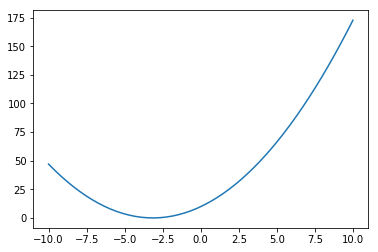

In [18]:
xa = np.linspace(-10, 10)
fix, ax = plt.subplots()
ax.plot(xa, f_x(xa))

## Symbolické úpravy

Toto je velice důležitá aplikace, která nám může v mnoha případech ušetřit nemálo práce.

### Expand a factor

Začněme pracovat s polynomem, zadaným jako

In [19]:
y = (x+1)*(x+2)*(x+3)
y

Polynom rozvineme pomocí `expand`:

In [20]:
z = sympy.expand(y)
z

Pomocí `factor` můžeme dostat zpět původní faktorizovaný výraz.

In [21]:
sympy.factor(z)

`expand` můžeme použít i pro trigonometrické funkce:

In [22]:
sympy.expand(sympy.sin(a + b), trig=True)

### Zjednodušování pomocí `simplify`

In [23]:
# tohle by měla být hračka
sympy.simplify(sympy.sin(a)**2 + sympy.cos(a)**2)

## Derivace a integrály

SymPy umí symbolicky derivovat (je tedy aspoň tak dobrý jako cvičená opice) a i integrovat.

In [24]:
y = (x**2 + sympy.sin(x))**2
y

In [25]:
sympy.diff(y, x)

Derivovat můžeme i funkce více proměnných.

In [26]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.cos(y) * (x**3 + 2*x**2*y)
z

Tohle spočítá

$\displaystyle \frac{{{{\rm{d}}^3}z}}{{{\rm{d}}x{\rm{d}}{y^2}}} $

In [27]:
sympy.diff(z, x, 1, y, 2)

### Integrace

In [28]:
f = sympy.sin(x * y) * sympy.cos(x)
f

In [29]:
sympy.integrate(f, x)

⎧                  2                              
⎪               cos (x)                           
⎪               ───────                 for y = -1
⎪                  2                              
⎪                                                 
⎪                  2                              
⎪              -cos (x)                           
⎨              ─────────                for y = 1 
⎪                  2                              
⎪                                                 
⎪  y⋅cos(x)⋅cos(x⋅y)   sin(x)⋅sin(x⋅y)            
⎪- ───────────────── - ───────────────  otherwise 
⎪         2                  2                    
⎪        y  - 1             y  - 1                
⎩                                                 

In [30]:
sympy.integrate(f, y)

⎛⎧    0       for x = 0⎞       
⎜⎪                     ⎟       
⎜⎨-cos(x⋅y)            ⎟⋅cos(x)
⎜⎪──────────  otherwise⎟       
⎝⎩    x                ⎠       

## Generace kódu

Automatická generace kódu vlastnost, kterou oceníme ve chvíli, kdy cheme implementovat naše analytické výsledky v numerické simulaci. Místo abychom začali ručně přepisovat do programovacího jazyka jako je např. Fortran nebo C, může SymPy tuto nezábavnou práci udělat za nás. Navíc při tom neudělá chyby (pravděpodobně).

*Pozor, tento module je work in progress.*

In [31]:
# řekněme že chceme někde použít tento výsledek
f = sympy.sin( x * y**2) * sympy.exp(y)
f

In [33]:
import sympy.utilities.codegen

In [34]:
f_source = sympy.utilities.codegen.codegen(("f_fortran", f), "F95", "f_fortran")
print(f_source[0][1])

!******************************************************************************
!*                      Code generated with sympy 1.1.1                       *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function f_fortran(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

f_fortran = exp(y)*sin(x*y**2)

end function



In [37]:
f_source = sympy.utilities.codegen.codegen(("f_C", f), "C", "f_C")
print(f_source[0][1])

/******************************************************************************
 *                      Code generated with sympy 1.1.1                       *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "f_C.h"
#include <math.h>

double f_C(double x, double y) {

   double f_C_result;
   f_C_result = exp(y)*sin(x*pow(y, 2));
   return f_C_result;

}



## Další možnosti SymPy

Ukázali jsme si základy práce se symbolickými výpočty pomocí SymPy. Není v našich silách ukázat, co všechno SymPy umí -- je toho opravdu hodně. Přehled můžeme získat, podívame-li se na obsah v [dokumentaci](http://docs.sympy.org/latest/index.html):

* SymPy Core
* Combinatorics Module
* Number Theory
* Concrete Mathematics
* Numerical evaluation
* Functions Module
* Geometry Module
* Geometric Algebra Module
* Geometric Algebra Module for SymPy
* Extended LaTeXModule for SymPy
* Symbolic Integrals
* Numeric Integrals
* Logic Module
* Matrices
* Mpmath
* Polynomials Manipulation Module
* Printing System
* Plotting Module
* Pyglet Plotting Module
* Assumptions module
* Term rewriting
* Series Expansions
* Sets
* Simplify
* Details on the Hypergeometric Function Expansion Module
* Statistics
* Stats
* ODE
* PDE
* Solvers
* Tensor Module
* Utilities
* Parsing input
* Physics Module
* Category Theory Module
* Differential Geometry Module
* Contributions to docs